In [1]:
# Import libraries. You may or may not use all of these.
# !pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# try:
#   # %tensorflow_version only exists in Colab.
#   %tensorflow_version 2.x
# except Exception:
#   pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
# Import data
# !wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')

In [4]:
# Convert all boolean columns to integers, just in case
dataset = dataset*1

In [5]:
dataset.tail()

,age,bmi,children,expenses,female,male,no,yes,northeast,northwest,southeast,southwest
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1
1337,61,29.1,0,29141.36,1,0,0,1,0,1,0,0


In [6]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=0)

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')


In [7]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='log_softmax'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()


/opt/homebrew/Caskroom/miniconda/base/envs/tf-fcc-ml-4/lib/python3.9/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,653 (76.77 KB)

 Trainable params: 19,653 (76.77 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Example of training the model
EPOCHS = 500

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])



Epoch: 0, loss:303705472.0000,  mae:12877.5635,  mse:304124352.0000,  val_loss:368362336.0000,  val_mae:14511.7910,  val_mse:372116864.0000,  
....................................................................................................
Epoch: 100, loss:117098952.0000,  mae:8601.0723,  mse:117189280.0000,  val_loss:136621312.0000,  val_mae:9060.5967,  val_mse:137613312.0000,  
....................................................................................................
Epoch: 200, loss:32853980.0000,  mae:3674.9700,  mse:32804612.0000,  val_loss:47374132.0000,  val_mae:4314.2158,  val_mse:47262844.0000,  
....................................................................................................
Epoch: 300, loss:28049256.0000,  mae:3188.8306,  mse:28095778.0000,  val_loss:40701924.0000,  val_mae:4061.2703,  val_mse:40700608.0000,  
....................................................................................................
Epoch: 400, loss:24869304.0000,

9/9 - 0s - 1ms/step - loss: 19059438.0000 - mae: 2799.6470 - mse: 19436486.0000
Testing set Mean Abs Error: 2799.65 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


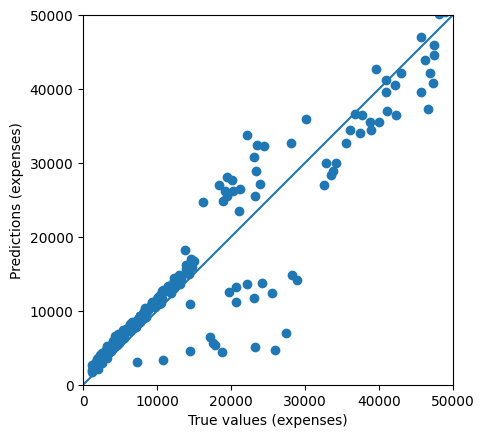

In [10]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
